# 1. Importing pacakges

In [196]:
import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as ET
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import torch
from sklearn.preprocessing import scale, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.neighbors import KNeighborsRegressor
import geopy.distance
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## 2. Importing and vizualizing the data

In [197]:
wifi_and_loc_file = '../data/Processed/full_wifi_data_and_location_without_1.csv'

## 2.1. Getting details about df

In [198]:
df_wifi_and_loc_file = pd.read_csv(wifi_and_loc_file, index_col=0)
df_wifi_and_loc_file.head()

,32:cd:a7:a0:6d:d8,84:b2:61:56:8a:01,84:b2:61:56:8a:02,84:b2:61:56:8a:00,84:b2:61:6d:3d:22,84:b2:61:6d:3d:21,84:b2:61:6d:3d:20,84:b2:61:5e:44:22,84:b2:61:5e:44:21,84:b2:61:5e:44:20,...,84:b2:61:6d:52:a1,84:b2:61:6d:52:a0,84:b2:61:6d:52:a2,84:b2:61:6d:52:af,84:b2:61:40:75:f1,84:b2:61:40:75:f2,84:b2:61:40:75:f0,c4:71:54:39:70:e4,lat,long
12:15:53:00,-39.0,-58.0,-58.0,-58.0,-70.0,-70.0,-70.0,-73.0,-73.0,-72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047613
12:15:54:00,-48.0,-51.0,-52.0,-52.0,-69.0,-71.0,-71.0,-74.0,-74.0,-74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047624
12:15:55:00,-45.0,-52.0,-52.0,-52.0,-72.0,-71.0,-71.0,-73.0,-73.0,-73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047637
12:15:56:00,-51.0,-42.0,-42.0,-42.0,-75.0,-72.0,-75.0,-79.0,-77.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047652
12:15:59:00,-50.0,-38.0,-37.0,-38.0,NaN,NaN,NaN,-61.0,-61.0,-62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047674


In [199]:
df_wifi_and_loc_file.dtypes

32:cd:a7:a0:6d:d8    float64
84:b2:61:56:8a:01    float64
84:b2:61:56:8a:02    float64
84:b2:61:56:8a:00    float64
84:b2:61:6d:3d:22    float64
84:b2:61:6d:3d:21    float64
84:b2:61:6d:3d:20    float64
84:b2:61:5e:44:22    float64
84:b2:61:5e:44:21    float64
84:b2:61:5e:44:20    float64
84:b2:61:47:dd:42    float64
84:b2:61:47:dd:41    float64
84:b2:61:47:dd:40    float64
84:b2:61:47:e2:c0    float64
84:b2:61:56:8a:0f    float64
84:b2:61:56:8a:0e    float64
84:b2:61:56:8a:0d    float64
84:b2:61:5e:44:2f    float64
84:b2:61:5e:44:2d    float64
84:b2:61:6d:3d:2e    float64
84:b2:61:5e:44:2e    float64
84:b2:61:6d:3d:2d    float64
84:b2:61:6d:3d:2f    float64
84:b2:61:47:dd:4e    float64
84:b2:61:47:dd:4f    float64
84:b2:61:47:dd:4d    float64
84:b2:61:47:e2:c2    float64
84:b2:61:47:e2:c1    float64
84:b2:61:6d:5d:70    float64
84:b2:61:6d:5d:72    float64
84:b2:61:6d:5d:71    float64
84:b2:61:47:e2:ce    float64
84:b2:61:47:e2:cd    float64
84:b2:61:6d:52:a1    float64
84:b2:61:6d:52

In [200]:
df_wifi_and_loc_file.columns

Index(['32:cd:a7:a0:6d:d8', '84:b2:61:56:8a:01', '84:b2:61:56:8a:02',
       '84:b2:61:56:8a:00', '84:b2:61:6d:3d:22', '84:b2:61:6d:3d:21',
       '84:b2:61:6d:3d:20', '84:b2:61:5e:44:22', '84:b2:61:5e:44:21',
       '84:b2:61:5e:44:20', '84:b2:61:47:dd:42', '84:b2:61:47:dd:41',
       '84:b2:61:47:dd:40', '84:b2:61:47:e2:c0', '84:b2:61:56:8a:0f',
       '84:b2:61:56:8a:0e', '84:b2:61:56:8a:0d', '84:b2:61:5e:44:2f',
       '84:b2:61:5e:44:2d', '84:b2:61:6d:3d:2e', '84:b2:61:5e:44:2e',
       '84:b2:61:6d:3d:2d', '84:b2:61:6d:3d:2f', '84:b2:61:47:dd:4e',
       '84:b2:61:47:dd:4f', '84:b2:61:47:dd:4d', '84:b2:61:47:e2:c2',
       '84:b2:61:47:e2:c1', '84:b2:61:6d:5d:70', '84:b2:61:6d:5d:72',
       '84:b2:61:6d:5d:71', '84:b2:61:47:e2:ce', '84:b2:61:47:e2:cd',
       '84:b2:61:6d:52:a1', '84:b2:61:6d:52:a0', '84:b2:61:6d:52:a2',
       '84:b2:61:6d:52:af', '84:b2:61:40:75:f1', '84:b2:61:40:75:f2',
       '84:b2:61:40:75:f0', 'c4:71:54:39:70:e4', 'lat', 'long'],
      dtype='object')

## 2.2. Vizualizing raw data from wifi and data concatenated file, without the first file (it had many outliers)

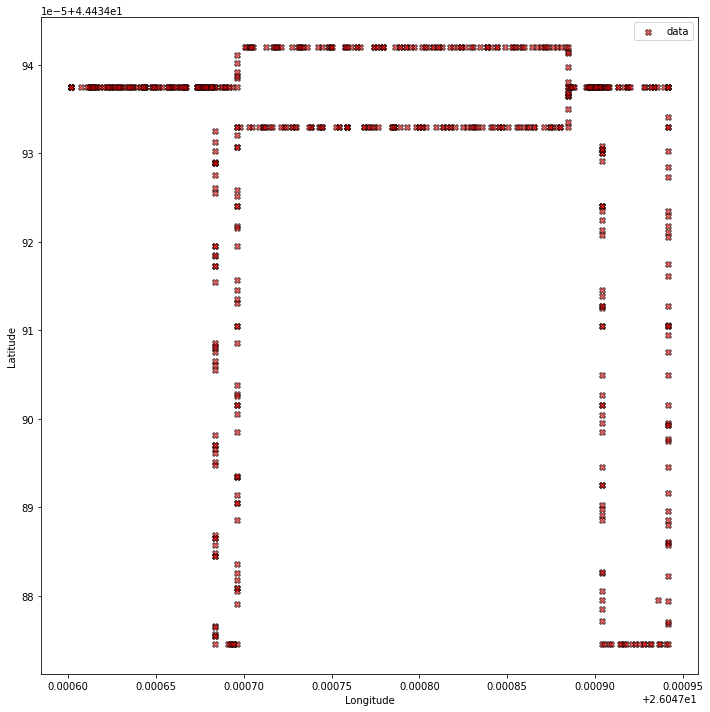

In [201]:
markers = ('s', 'X', 'o')
colors = ('red', 'yellow', 'lightgreen')
cmap = ListedColormap(colors[:1])


fig = plt.figure(figsize=(10,10))
plt.scatter(x=df_wifi_and_loc_file['long'], 
            y=df_wifi_and_loc_file['lat'],
            alpha=0.6, 
            c=[cmap(1)],
            edgecolor='black',
            marker=markers[1], 
            label='data')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

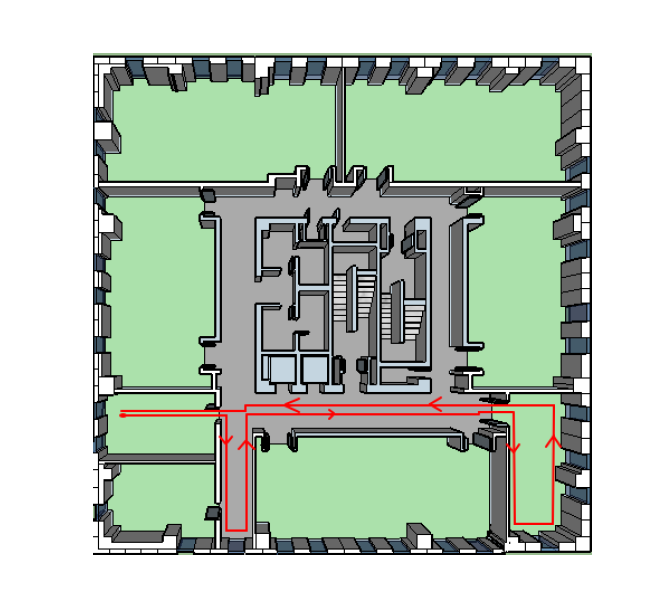

In [202]:
wifi_and_loc_file1 = '../data/Processed/wifi_data_and_location_1.csv'
wifi_and_loc_file2 = '../data/Processed/wifi_data_and_location_2.csv'
wifi_and_loc_file3 = '../data/Processed/wifi_data_and_location_3.csv'
wifi_and_loc_file4 = '../data/Processed/wifi_data_and_location_4.csv'
wifi_and_loc_file5 = '../data/Processed/wifi_data_and_location_5.csv'
wifi_and_loc_file6 = '../data/Processed/wifi_data_and_location_6.csv'
wifi_and_loc_file7 = '../data/Processed/wifi_data_and_location_7.csv'
wifi_and_loc_file8 = '../data/Processed/wifi_data_and_location_8.csv'

df_wifi_and_loc_file1 = pd.read_csv(wifi_and_loc_file1, index_col=0)
df_wifi_and_loc_file2 = pd.read_csv(wifi_and_loc_file2, index_col=0)
df_wifi_and_loc_file3 = pd.read_csv(wifi_and_loc_file3, index_col=0)
df_wifi_and_loc_file4 = pd.read_csv(wifi_and_loc_file4, index_col=0)
df_wifi_and_loc_file5 = pd.read_csv(wifi_and_loc_file5, index_col=0)
df_wifi_and_loc_file6 = pd.read_csv(wifi_and_loc_file6, index_col=0)
df_wifi_and_loc_file7 = pd.read_csv(wifi_and_loc_file7, index_col=0)
df_wifi_and_loc_file8 = pd.read_csv(wifi_and_loc_file8, index_col=0)

<AxesSubplot:xlabel='long'>

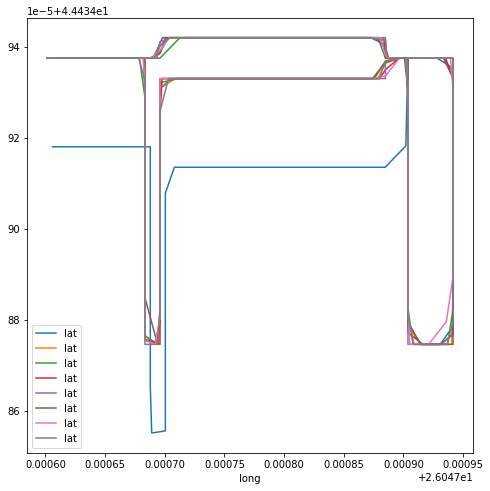

In [203]:
ax = df_wifi_and_loc_file1.plot(x='long', y='lat', figsize=(8, 8))
df_wifi_and_loc_file2.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file3.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file4.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file5.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file6.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file7.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file8.plot(ax=ax, x='long', y='lat')

# The first file is different than the rest

## 2.3. Normalizing lat and longitude

In [204]:
# Function to normalize a column using Min-Max normalization
def normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized = (column - min_val) / (max_val - min_val)
    return normalized

In [205]:
max_lat = df_wifi_and_loc_file['lat'].max()
min_lat = df_wifi_and_loc_file['lat'].min()
max_long = df_wifi_and_loc_file['long'].max()
min_long = df_wifi_and_loc_file['long'].min()
df_wifi_and_loc_file['normalized_lat'] = normalize(df_wifi_and_loc_file['lat'])
df_wifi_and_loc_file['normalized_long'] = normalize(df_wifi_and_loc_file['long'])

## 2.4. Vizualizing normalized lat and longitude

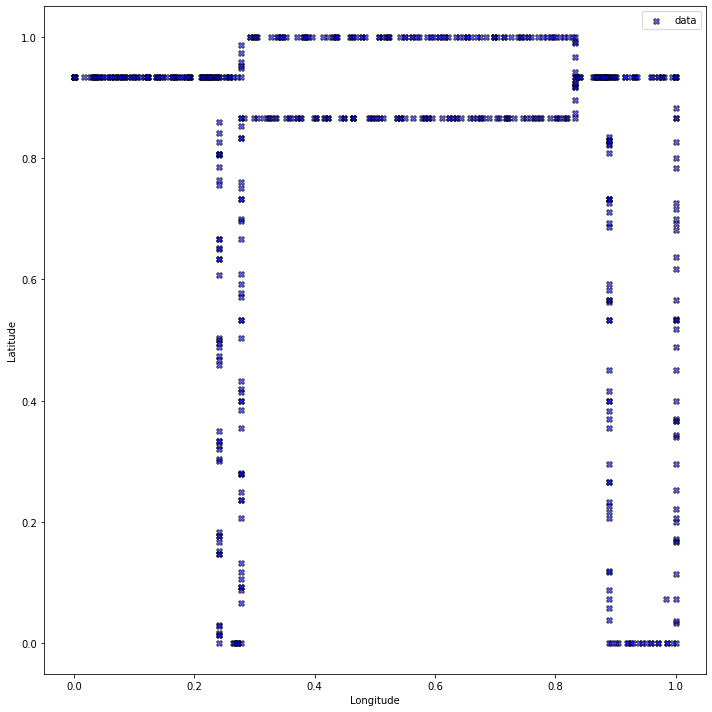

In [206]:
markers = ('s', 'X', 'o')
colors = ('blue', 'yellow', 'lightgreen')
cmap = ListedColormap(colors[:1])


fig = plt.figure(figsize=(10,10))
plt.scatter(x=df_wifi_and_loc_file['normalized_long'], 
            y=df_wifi_and_loc_file['normalized_lat'],
            alpha=0.6, 
            c=[cmap(1)],
            edgecolor='black',
            marker=markers[1], 
            label='data')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

## 2.4. Filling the NaN values with -100 db

In [207]:
df_wifi_and_loc_file.fillna(-100, inplace=True)

## 2.5. Attributing the values to rooms

In [208]:
df_wifi_and_loc_file['room'] = np.nan

df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] <= 0.2), 'room'] = 0
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] > 0.2) &
                         (df_wifi_and_loc_file['normalized_long'] <= 0.3), 'room'] = 1
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] > 0.3) &
                         (df_wifi_and_loc_file['normalized_long'] < 0.85), 'room'] = 2
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] >= 0.85), 'room'] = 3
df_wifi_and_loc_file

,32:cd:a7:a0:6d:d8,84:b2:61:56:8a:01,84:b2:61:56:8a:02,84:b2:61:56:8a:00,84:b2:61:6d:3d:22,84:b2:61:6d:3d:21,84:b2:61:6d:3d:20,84:b2:61:5e:44:22,84:b2:61:5e:44:21,84:b2:61:5e:44:20,...,84:b2:61:6d:52:af,84:b2:61:40:75:f1,84:b2:61:40:75:f2,84:b2:61:40:75:f0,c4:71:54:39:70:e4,lat,long,normalized_lat,normalized_long,room
12:15:53:00,-39.0,-58.0,-58.0,-58.0,-70.0,-70.0,-70.0,-73.0,-73.0,-72.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047613,0.933334,0.032408,0.0
12:15:54:00,-48.0,-51.0,-52.0,-52.0,-69.0,-71.0,-71.0,-74.0,-74.0,-74.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047624,0.933334,0.066667,0.0
12:15:55:00,-45.0,-52.0,-52.0,-52.0,-72.0,-71.0,-71.0,-73.0,-73.0,-73.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047637,0.933334,0.103704,0.0
12:15:56:00,-51.0,-42.0,-42.0,-42.0,-75.0,-72.0,-75.0,-79.0,-77.0,-79.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047652,0.933334,0.148148,0.0
12:15:59:00,-50.0,-38.0,-37.0,-38.0,-100.0,-100.0,-100.0,-61.0,-61.0,-62.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047674,0.933334,0.212005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19:09:23:00,-56.0,-55.0,-54.0,-55.0,-72.0,-72.0,-73.0,-71.0,-71.0,-71.0,...,-100.0,-100.0,-100.0,-100.0,-96.0,44.434937,26.047657,0.933333,0.162963,0.0
19:09:24:00,-49.0,-49.0,-49.0,-49.0,-74.0,-74.0,-74.0,-78.0,-77.0,-78.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047642,0.933333,0.120370,0.0
19:09:25:00,-49.0,-55.0,-54.0,-54.0,-80.0,-80.0,-79.0,-79.0,-80.0,-79.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047628,0.933333,0.078189,0.0
19:09:26:00,-46.0,-61.0,-61.0,-61.0,-72.0,-72.0,-72.0,-74.0,-74.0,-74.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047614,0.933333,0.037037,0.0


C:\Users\Enachele\AppData\Local\Temp\ipykernel_1708\480135349.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_long'],


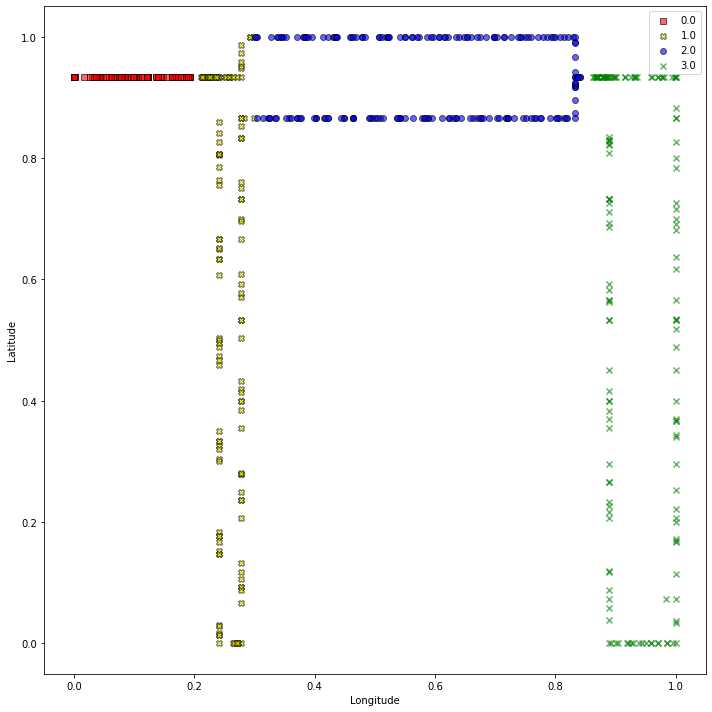

In [209]:
markers = ('s', 'X', 'o', 'x')
colors = ('red', 'yellow', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(df_wifi_and_loc_file['room']))])


fig = plt.figure(figsize=(10,10))
for idx, cl in enumerate(np.unique(df_wifi_and_loc_file['room'])):
        plt.scatter(x=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_long'], 
                    y=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_lat'],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

# 3. Data preprocessing

## 3.1. Splitting data in labels and target for the first DNN (Step 1)

In [254]:
X = df_wifi_and_loc_file.iloc[:, :41].values
y = df_wifi_and_loc_file['room'].values
X, y

(array([[ -39.,  -58.,  -58., ..., -100., -100., -100.],
        [ -48.,  -51.,  -52., ..., -100., -100., -100.],
        [ -45.,  -52.,  -52., ..., -100., -100., -100.],
        ...,
        [ -49.,  -55.,  -54., ..., -100., -100., -100.],
        [ -46.,  -61.,  -61., ..., -100., -100., -100.],
        [ -46.,  -61.,  -61., ..., -100., -100., -100.]]),
 array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 1., 1., 1., 0.,

## 3.2. Splitting the dataset in Training and Test set

In [255]:
val_limit = int(len(df_wifi_and_loc_file)*0.9)
X_val = X[val_limit:, :]
y_val = y[val_limit:]
X = X[:val_limit, :]
y = y[:val_limit]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

[[ -80.  -83.  -83. ... -100. -100. -100.]
 [ -86.  -81.  -82. ... -100. -100. -100.]
 [ -87.  -82.  -82. ... -100. -100. -100.]
 ...
 [ -49.  -55.  -54. ... -100. -100. -100.]
 [ -46.  -61.  -61. ... -100. -100. -100.]
 [ -46.  -61.  -61. ... -100. -100. -100.]]


((381, 41), (96, 41), (53, 41), (381,), (96,), (53,))

In [256]:
print(X_train)
print('X_train number of values: ', len(X_train))

[[ -65.  -53.  -53. ... -100. -100. -100.]
 [ -60.  -49.  -49. ... -100. -100. -100.]
 [ -56.  -61.  -61. ... -100. -100. -100.]
 ...
 [ -85.  -81.  -80. ... -100. -100. -100.]
 [ -70.  -66.  -66. ... -100. -100. -100.]
 [ -77.  -80.  -80. ... -100. -100. -100.]]
X_train number of values:  381


## 3.3. Features scaling

In [257]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [258]:
X_train.shape

(381, 41)

In [259]:
y_train.shape

(381,)

# 4. Building the first DNN model

### 4.1. Initializing the NN

In [260]:
nn = Sequential()

### 4.2. Adding the input layer and the first hidden layer

In [261]:
# Adding a fully-connected layer (it automatically create the input layer)
# num of neurons = num of features (41 APs)
input_size = 41
nn.add(Dense(input_dim=input_size, units=256, activation='relu'))

### 4.3. Adding the second layer

In [262]:
# Adding a layer with 128 neurons
nn.add(Dense(units=128, activation='relu'))

### 4.4. Adding the output layer

In [263]:
# sotmax for > 2 categories
classes = 4 # number of rooms
nn.add(Dense(units=classes, activation='softmax'))

# 5. Training the DNN

### 5.1. Compiling the DNN

In [264]:
# Optimizer = Adam ==> Stochastic Gradient Descent
nn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

### 5.2. Training the NN on the Training set

In [305]:
nn.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9843
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9843
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9869
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9816
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9816
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9764
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9869
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9816
Epoch 9/30
12/12 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9869
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9843
Epoch 11/30
12/12 [

# 6. Making predictions and evaluating the model

### 6.1. Predicting the test results

In [266]:
y_pred = nn.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [267]:
y_pred

array([[6.03058993e-07, 9.99996185e-01, 3.05572439e-06, 1.26565084e-07],
       [6.13288535e-03, 9.93396759e-01, 4.70123283e-04, 2.45713892e-07],
       [1.20278895e-12, 6.42761297e-05, 9.99935746e-01, 5.11967191e-10],
       [5.57356202e-07, 1.03785525e-04, 6.85585064e-06, 9.99888778e-01],
       [1.12756283e-03, 5.37125349e-01, 4.61339533e-01, 4.07572748e-04],
       [3.73503930e-08, 1.00000000e+00, 4.42952341e-09, 1.64289448e-12],
       [1.14392662e-09, 5.53078962e-07, 4.09479526e-08, 9.99999404e-01],
       [5.77809078e-05, 1.90262180e-02, 9.80915308e-01, 7.53346342e-07],
       [4.82448627e-07, 1.15725952e-05, 1.95691013e-04, 9.99792278e-01],
       [7.34434889e-06, 1.92352163e-05, 9.99903321e-01, 7.00723540e-05],
       [9.98347521e-01, 1.60487997e-03, 4.66224301e-05, 9.15107194e-07],
       [2.26597531e-05, 9.99976516e-01, 8.00388477e-07, 5.55363588e-10],
       [9.98889267e-01, 5.24284958e-04, 5.85952657e-04, 5.18145669e-07],
       [4.53585500e-07, 9.99989390e-01, 9.79265042e

In [268]:
y_pred.shape

(96, 4)

#### 6.1.1. Transforming the encoded data back to room number

In [309]:
# tf argmax returns the index of the largest value in the tensor
room_pred = tf.argmax(y_pred, axis=1)
# This connects to keras backend -- why is here though?
# room_pred = tf.keras.backend.eval(room_pred)
# print(room_pred)

In [310]:
room_pred

<tf.Tensor: shape=(96,), dtype=int64, numpy=
array([1, 1, 2, 3, 1, 1, 3, 2, 3, 2, 0, 1, 0, 1, 2, 1, 3, 2, 0, 3, 0, 2,
       1, 3, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 2, 1, 3,
       3, 0, 2, 1, 1, 3, 3, 1, 2, 1, 1, 2, 3, 0, 1, 2, 3, 3, 1, 3, 3, 1,
       0, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 1, 2, 3, 0, 2, 1, 3, 2, 2, 2, 1,
       1, 1, 1, 3, 3, 2, 2, 2], dtype=int64)>

### 6.2. Making the confusion matrix and calculating Accuracy 

In [311]:
cm = confusion_matrix(y_test, room_pred)
print(cm)
accuracy = accuracy_score(y_test, room_pred)
print('Accuracy: ', accuracy)

[[ 9  1  0  0]
 [ 0 30  0  0]
 [ 0  1 31  1]
 [ 0  0  1 22]]
Accuracy:  0.9583333333333334


In [272]:
print(classification_report(y_test, room_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.94      1.00      0.97        30
         2.0       0.97      0.94      0.95        33
         3.0       0.96      0.96      0.96        23

    accuracy                           0.96        96
   macro avg       0.97      0.95      0.96        96
weighted avg       0.96      0.96      0.96        96



### TODO : 6.3. Predicting with the Validation set

In [276]:
X_val = sc.fit_transform(X_val)

In [277]:
y_pred_val = nn.predict(X_val)
y_pred_val

2/2 [==============================] - 0s 3ms/step


array([[2.35828850e-07, 6.74575858e-07, 9.99955177e-01, 4.39591240e-05],
       [3.86810797e-07, 3.38004747e-06, 9.99465287e-01, 5.30958059e-04],
       [8.23764097e-08, 3.04659210e-07, 9.99242187e-01, 7.57398782e-04],
       [6.51061009e-06, 1.51304757e-05, 9.99730289e-01, 2.48043740e-04],
       [1.48171440e-11, 2.74837873e-07, 9.99999762e-01, 3.95038890e-10],
       [1.60463169e-05, 1.85245604e-04, 9.98320282e-01, 1.47834141e-03],
       [1.24401492e-06, 7.43087139e-06, 9.99682903e-01, 3.08512739e-04],
       [6.35563047e-05, 1.17112452e-03, 7.74915159e-01, 2.23850086e-01],
       [6.35563047e-05, 1.17112452e-03, 7.74915159e-01, 2.23850086e-01],
       [8.34926395e-05, 1.61084157e-04, 6.87219948e-02, 9.31033492e-01],
       [6.69073279e-06, 2.22807706e-04, 1.24175777e-03, 9.98528719e-01],
       [7.26383587e-05, 2.06441575e-04, 1.55318333e-02, 9.84188974e-01],
       [1.04491517e-06, 1.96267036e-04, 6.62913772e-06, 9.99796093e-01],
       [7.98808924e-06, 4.40384895e-01, 2.63342372e

In [278]:
y_pred_val.shape

(53, 4)

In [316]:
room_pred_val = tf.argmax(y_pred_val, axis=1)
room_pred_val = tf.keras.backend.eval(room_pred_val)

In [317]:
room_pred_val

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
cm = confusion_matrix(y_val, room_pred_val)
print(cm)
accuracy = accuracy_score(y_val, room_pred_val)
print('Accuracy: ', accuracy)

[[ 6  0  0  0]
 [ 0  3  0  0]
 [ 0  3 19  0]
 [ 0  0  1 21]]
Accuracy:  0.9245283018867925


In [282]:
print(classification_report(y_val, room_pred_val))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.50      1.00      0.67         3
         2.0       0.95      0.86      0.90        22
         3.0       1.00      0.95      0.98        22

    accuracy                           0.92        53
   macro avg       0.86      0.95      0.89        53
weighted avg       0.95      0.92      0.93        53



## 7. Building the KNN regressor

### 7.1. Creating the second training dataset

#### 7.1.1. Selecting the cluster to which out values correspond to (the room)

In [283]:
room = 2
# floor = floor_pred_valid[0] # TODO: verify how can we change this so it gets the room by default
mask = df_wifi_and_loc_file['room'] == room

In [288]:
df_ap = df_wifi_and_loc_file.iloc[:, :41][mask]
df_floor = df_wifi_and_loc_file['room'][mask]
df_floor, df_ap

(12:16:16:00    2.0
 12:16:17:00    2.0
 12:16:18:00    2.0
 12:16:19:00    2.0
 12:16:20:00    2.0
               ... 
 19:09:11:00    2.0
 19:09:12:00    2.0
 19:09:13:00    2.0
 19:09:14:00    2.0
 19:09:15:00    2.0
 Name: room, Length: 188, dtype: float64,
              32:cd:a7:a0:6d:d8  84:b2:61:56:8a:01  84:b2:61:56:8a:02  \
 12:16:16:00              -72.0              -64.0              -64.0   
 12:16:17:00              -74.0              -59.0              -63.0   
 12:16:18:00              -76.0              -65.0              -66.0   
 12:16:19:00              -77.0              -74.0              -74.0   
 12:16:20:00              -76.0              -73.0              -73.0   
 ...                        ...                ...                ...   
 19:09:11:00              -64.0              -49.0              -49.0   
 19:09:12:00              -63.0              -39.0              -39.0   
 19:09:13:00              -59.0              -41.0              -42.0   
 19:09:1

In [289]:
X_step_2 = pd.concat([df_ap, df_floor], axis=1).values
y_step_2 = df_wifi_and_loc_file[['lat', 'long']][mask].values

In [290]:
X_step_2

array([[ -72.,  -64.,  -64., ..., -100., -100.,    2.],
       [ -74.,  -59.,  -63., ..., -100., -100.,    2.],
       [ -76.,  -65.,  -66., ..., -100., -100.,    2.],
       ...,
       [ -59.,  -41.,  -42., ..., -100., -100.,    2.],
       [ -57.,  -49.,  -49., ..., -100., -100.,    2.],
       [ -53.,  -42.,  -42., ..., -100., -100.,    2.]])

In [291]:
y_step_2

array([[44.434933  , 26.04770856],
       [44.434933  , 26.04772272],
       [44.434933  , 26.04773847],
       [44.434933  , 26.04775421],
       [44.434933  , 26.04776873],
       [44.434933  , 26.04778412],
       [44.434933  , 26.04779829],
       [44.434933  , 26.04781351],
       [44.434933  , 26.0478291 ],
       [44.434933  , 26.04784552],
       [44.434933  , 26.04786149],
       [44.434933  , 26.04787858],
       [44.43493643, 26.04788488],
       [44.4349375 , 26.04788603],
       [44.43494143, 26.04788488],
       [44.434942  , 26.04787089],
       [44.434942  , 26.04785654],
       [44.434942  , 26.0478408 ],
       [44.434942  , 26.04782611],
       [44.434942  , 26.04781309],
       [44.434942  , 26.0478013 ],
       [44.434942  , 26.04778592],
       [44.434942  , 26.04777405],
       [44.434942  , 26.04775778],
       [44.434942  , 26.04774476],
       [44.434942  , 26.04773123],
       [44.434942  , 26.04771835],
       [44.434933  , 26.04771107],
       [44.434933  ,

### 7.2. Splitting the data in Train and Test

In [292]:
X_train_step_2, X_test_step_2, y_train_step_2, y_test_step_2 = train_test_split(X_step_2,
                                                                                y_step_2, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0)

In [293]:
X_train_step_2

array([[ -68.,  -63.,  -62., ..., -100., -100.,    2.],
       [ -80.,  -70.,  -70., ..., -100., -100.,    2.],
       [ -69.,  -63.,  -63., ..., -100., -100.,    2.],
       ...,
       [ -72.,  -62.,  -64., ...,  -96., -100.,    2.],
       [ -65.,  -53.,  -53., ..., -100., -100.,    2.],
       [ -63.,  -76.,  -73., ..., -100., -100.,    2.]])

In [294]:
len(X_train_step_2)

150

### 7.3. Building the model

In [295]:
knn_regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_regressor.fit(X_train_step_2, y_train_step_2)

KNeighborsRegressor(n_neighbors=3, weights='distance')

### 7.4. Making predictions and evaluating the model

In [296]:
y_pred_step_2 = knn_regressor.predict(X_test_step_2)
y_pred_step_2

array([[44.434942  , 26.04771801],
       [44.434942  , 26.04780459],
       [44.434942  , 26.04771469],
       [44.434933  , 26.04786692],
       [44.43493861, 26.04788488],
       [44.434933  , 26.04774981],
       [44.434942  , 26.047827  ],
       [44.434933  , 26.04772311],
       [44.434942  , 26.04776668],
       [44.434933  , 26.0478138 ],
       [44.434933  , 26.04778538],
       [44.434933  , 26.04783096],
       [44.434942  , 26.04781561],
       [44.434942  , 26.04780013],
       [44.434942  , 26.04773154],
       [44.434942  , 26.04783937],
       [44.434933  , 26.04786151],
       [44.43493811, 26.04788184],
       [44.434933  , 26.04771786],
       [44.434942  , 26.04777599],
       [44.434933  , 26.04774046],
       [44.434942  , 26.04776046],
       [44.434933  , 26.0477555 ],
       [44.43493589, 26.04788488],
       [44.434933  , 26.04782672],
       [44.43494093, 26.04787716],
       [44.434933  , 26.04786233],
       [44.434933  , 26.04773935],
       [44.434942  ,

In [298]:
y_pred_step_2.shape, y_test_step_2.shape

((38, 2), (38, 2))

In [299]:
print(mean_squared_error(y_test_step_2, y_pred_step_2))

4.1906906521086845e-11


In [300]:
print(mean_squared_error(y_test_step_2, y_pred_step_2, multioutput='raw_values'))

[1.02485349e-13 8.37113277e-11]


In [301]:
y_pred_step_2 = pd.DataFrame(y_pred_step_2, columns=['long1', 'lat1'])
y_test_step_2 = pd.DataFrame(y_test_step_2, columns=['long2', 'lat2'])
# alculating the Euclidian distance between points
distance_df = pd.DataFrame((y_test_step_2['lat2']-y_pred_step_2['lat1'])**2 + 
                           (y_test_step_2['long2']-y_pred_step_2['long1'])**2)**(1/2)
sum_dist = distance_df.sum()
mean_error = sum_dist/len(distance_df)
mean_error

0    0.000006
dtype: float64

In [302]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred_step_2, y_test_step_2], axis=1)
df_final

,long1,lat1,long2,lat2
0,44.434942,26.047718,44.434942,26.047720
1,44.434942,26.047805,44.434942,26.047819
2,44.434942,26.047715,44.434942,26.047718
3,44.434933,26.047867,44.434933,26.047865
4,44.434939,26.047885,44.434940,26.047885
5,44.434933,26.047750,44.434933,26.047759
6,44.434942,26.047827,44.434942,26.047826
7,44.434933,26.047723,44.434933,26.047727
8,44.434942,26.047767,44.434942,26.047764
9,44.434933,26.047814,44.434933,26.047814


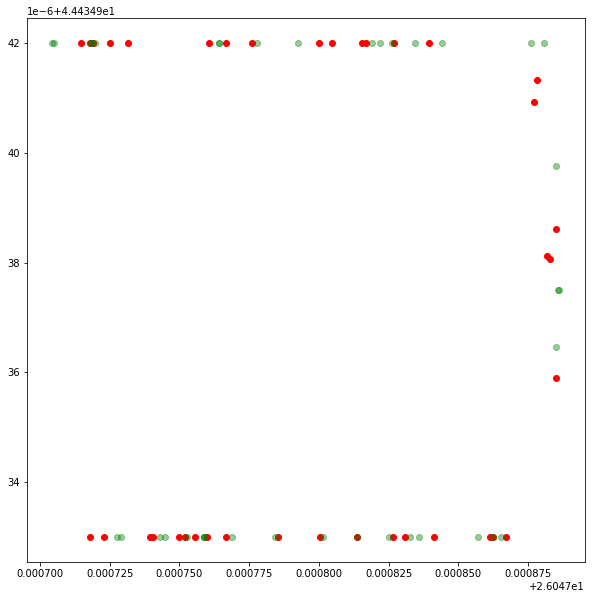

In [304]:
plt.figure(figsize=(10,10))
plt.scatter(df_final['lat1'], df_final['long1'], color='red')
plt.scatter(df_final['lat2'], df_final['long2'], color='green', alpha=0.4)